# **A Classification Problem: Predicting Cardiovascular Disease**
**Sindhu Bhattarai, Angela Zhang, and Abanather Negusu**
**08/15/2022**


In [ ]:
# All you may need as the IMPORTS :)
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import json
# This ensures that sklearn 0.24 is loaded on Google colab
# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn
#!pip install scikit-learn==0.24.1

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron

# **Data Loading**

In [ ]:
# #importing files to upload and access files from my computer
from google.colab import files
uploaded = files.upload()


Saving cardio_train.csv to cardio_train.csv


In [ ]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Exploratory Data Analysis (EDA)**

## **Univariate exploration**

In this section we will be looking at each variable, it's didtribution, null values and outliers. 

In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.shape

(70000, 13)

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.dtypes)


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [ ]:
# Change age from days format to year format
def age_years(age):
    age_inyrs = age /365
    return age_inyrs

In [ ]:
df['age'] = df['age'].apply(age_years)
df['age']

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#round it up into a whole number uaing numpy.ceil
df['age'] = df['age'].astype(float).apply(np.ceil)
# converting age column data type into integer
df['age']= df['age'].astype(int)

df['age']

0        51
1        56
2        52
3        49
4        48
         ..
69995    53
69996    62
69997    53
69998    62
69999    57
Name: age, Length: 70000, dtype: int64

### **Outlier check and distribution analysis of features** 

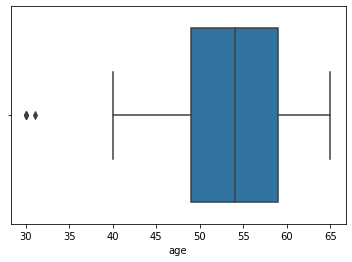

In [ ]:
#Checking for outliers
sns.boxplot(x=df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


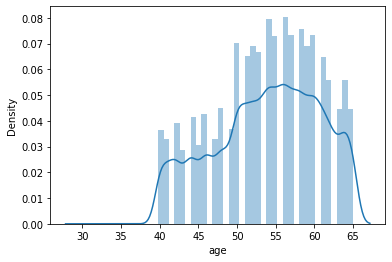

In [ ]:
sns.distplot(df['age']) 
plt.show()

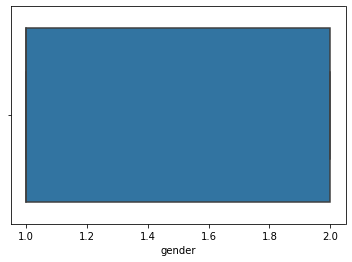

In [ ]:
sns.boxplot(x=df['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


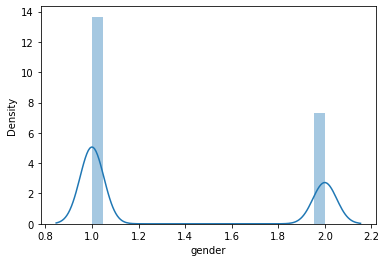

In [ ]:
sns.distplot(df['gender']) 
plt.show()

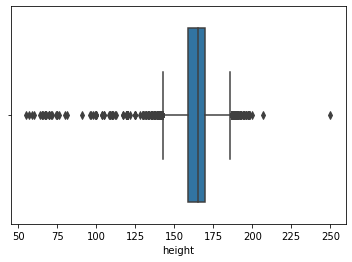

In [ ]:
sns.boxplot(x=df['height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


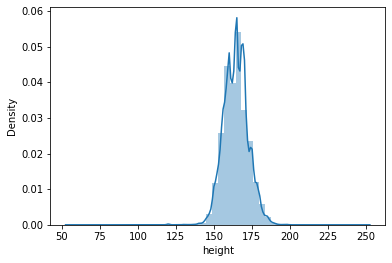

In [ ]:
sns.distplot(df['height']) 
plt.show()

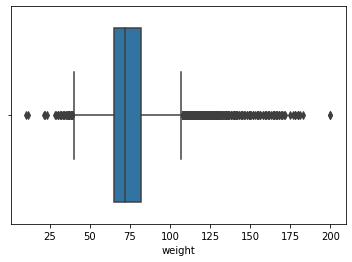

In [ ]:
sns.boxplot(x=df['weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


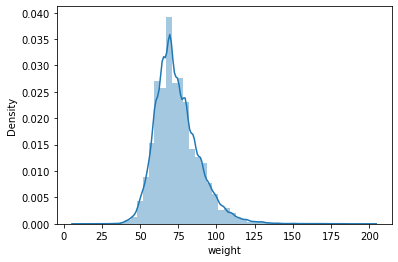

In [ ]:
sns.distplot(df['weight']) 
plt.show()

While closely looking at the height and weight columns, we can notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.024))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.024))].index,inplace=True)

In [ ]:
df.shape

(63866, 13)

Another condition is incompatible with normal life. In some cases diastolic pressure is higher than systolic which is impossible with normal physiologic condition.

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.98)) | (df['ap_hi'] < df['ap_hi'].quantile(0.019))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.98)) | (df['ap_lo'] < df['ap_lo'].quantile(0.019))].index,inplace=True)

Diastolic pressure is higher than systolic one in 0 cases


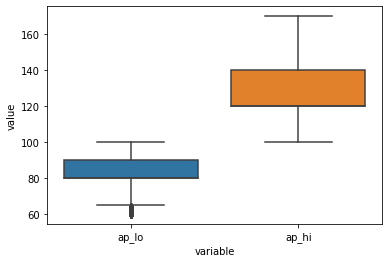

In [ ]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastolic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [ ]:
df.shape

(60656, 13)

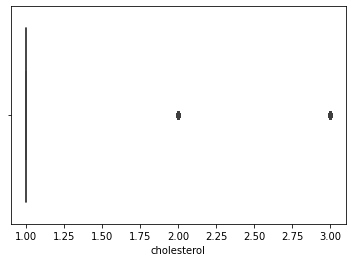

In [ ]:
sns.boxplot(x=df['cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


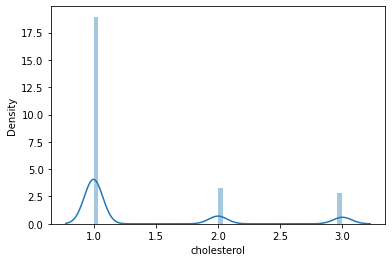

In [ ]:
sns.distplot(df['cholesterol']) 
plt.show()

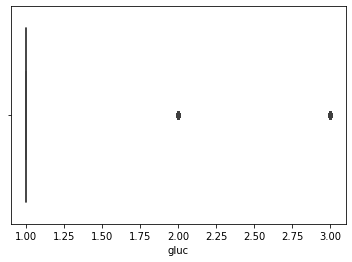

In [ ]:
sns.boxplot(x=df['gluc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


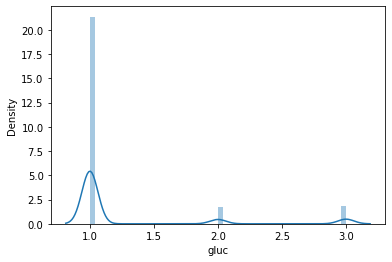

In [ ]:
sns.distplot(df['gluc']) 
plt.show()

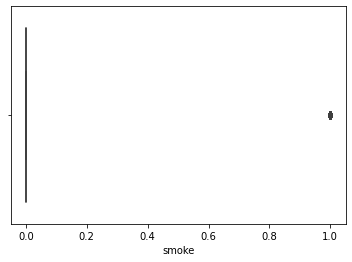

In [ ]:
sns.boxplot(x=df['smoke'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


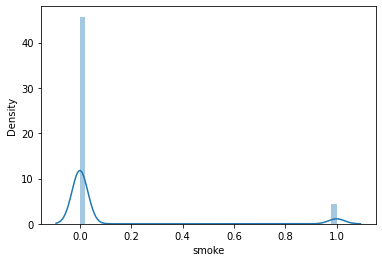

In [ ]:
sns.distplot(df['smoke']) 
plt.show()

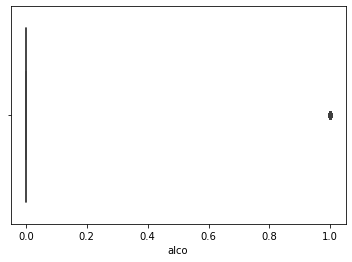

In [ ]:
sns.boxplot(x=df['alco'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


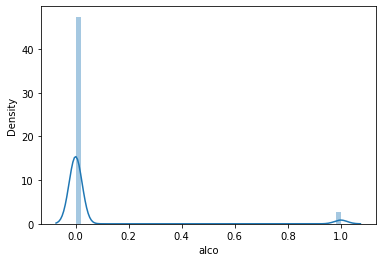

In [ ]:
sns.distplot(df['alco']) 
plt.show()

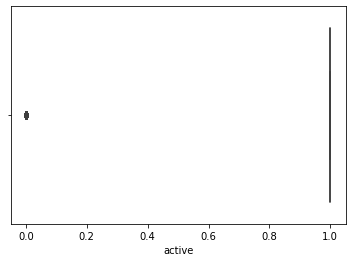

In [ ]:
sns.boxplot(x=df['active'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


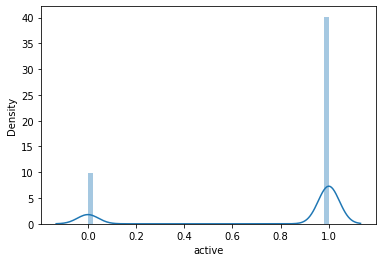

In [ ]:
sns.distplot(df['active']) 
plt.show()

## **Multivariate Exploration**

In this section we will be visualizing the relation between variables and target output using barplot, compare with each other and also check for the multicollinearity to have a understanding of relationship among variable.

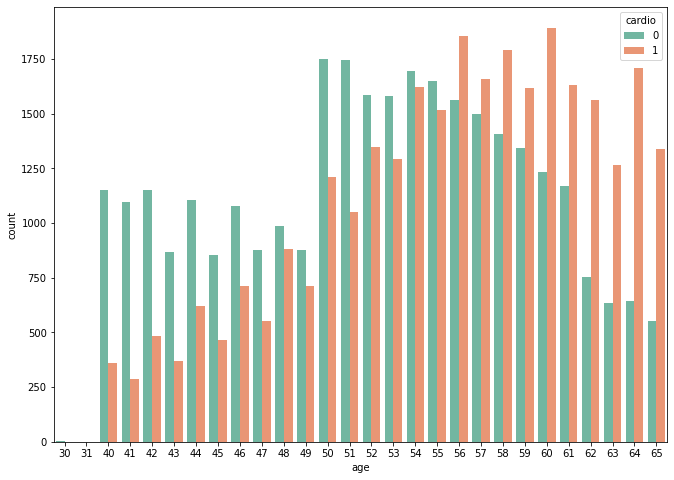

In [ ]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");



**It looks like higher age group has more chances of getting cardiovascular problems**



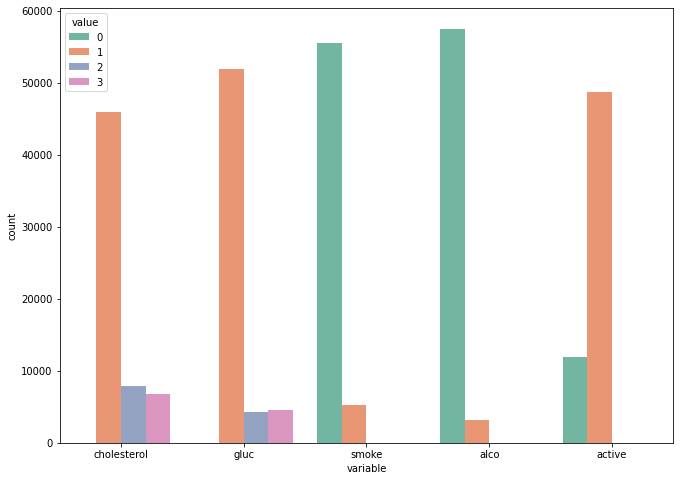

In [ ]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical),palette="Set2");

# **Feature Engeeniering**

In [ ]:
#Adding a new column 'BMI' to the data frame
df['bmi']=(df['weight']/(df['height'] **2) * 10000)
df['bmi']=df['bmi'].round(decimals = 1)

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,51,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,56,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,49,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,54,1,172,70.0,130,90,1,1,0,0,1,1,23.7
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.4
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.9
69998,99998,62,1,163,72.0,135,80,1,2,0,0,0,1,27.1


In [ ]:
first_column = df.pop('cardio')
df.insert(0, 'cardio', first_column)



# **Checking Multicollinearity**

In [ ]:
# X =  df.loc[:,'age':'bmi']
# X

In [ ]:
# corr = X.corr(method='pearson')
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )

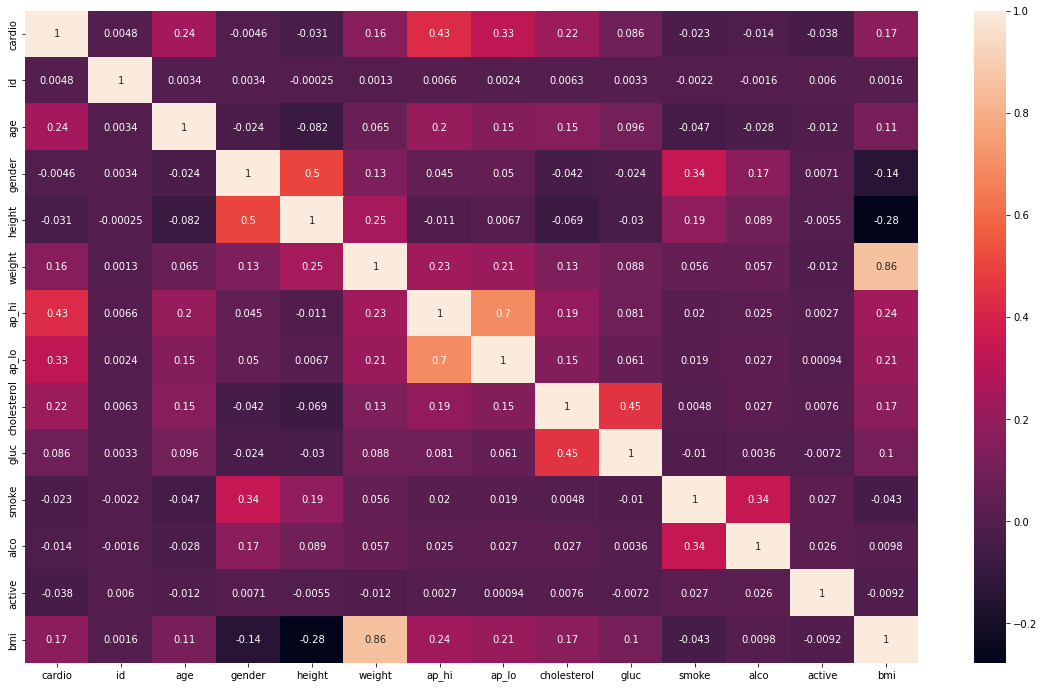

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

# **Class Imbalance check**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


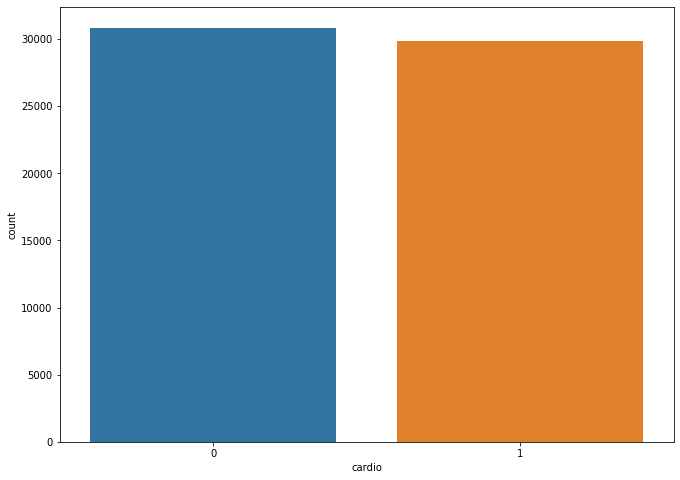

In [ ]:
sns.countplot(df['cardio'])
plt.show()

**No severe class imbalance**



In [ ]:
df

,cardio,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,0,0,51,2,168,62.0,110,80,1,1,0,0,1,22.0
1,1,1,56,1,156,85.0,140,90,3,1,0,0,1,34.9
2,1,2,52,1,165,64.0,130,70,3,1,0,0,0,23.5
3,1,3,49,2,169,82.0,150,100,1,1,0,0,1,28.7
4,0,4,48,1,156,56.0,100,60,1,1,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,99991,54,1,172,70.0,130,90,1,1,0,0,1,23.7
69994,1,99992,58,1,165,80.0,150,80,1,1,0,0,1,29.4
69995,0,99993,53,2,168,76.0,120,80,1,1,1,0,1,26.9
69998,1,99998,62,1,163,72.0,135,80,1,2,0,0,0,27.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36d5659710>,
      dtype=object)

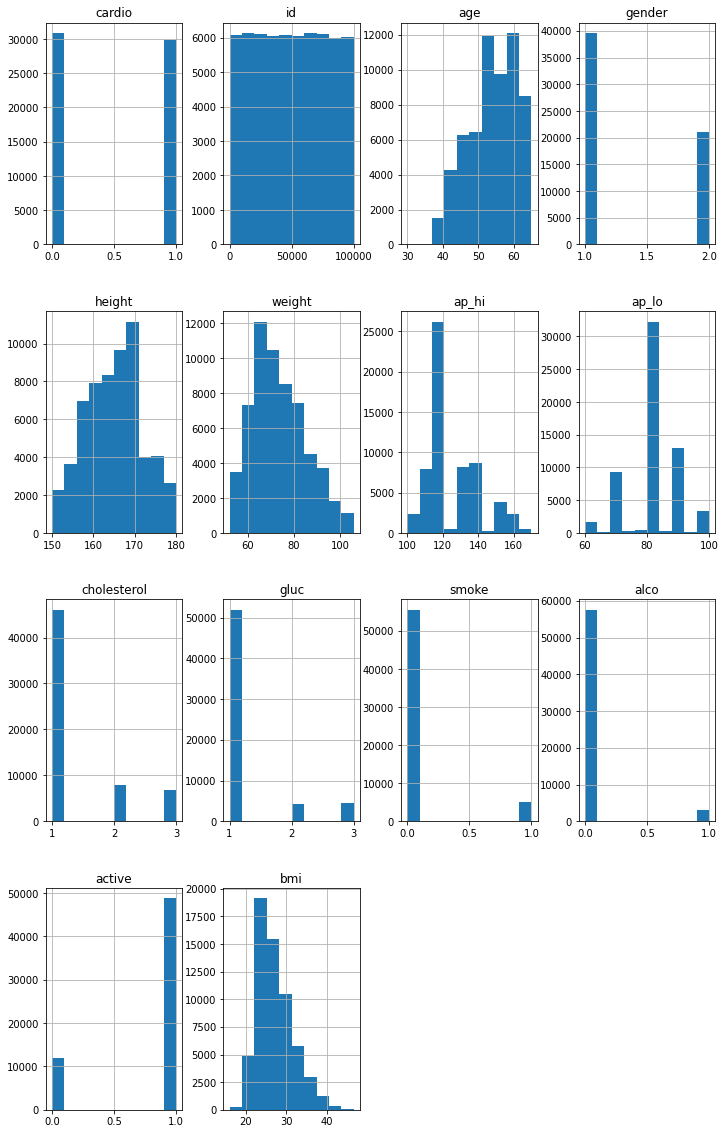

In [ ]:
fig = plt.figure(figsize = (12,20))
ax = fig.gca()
df.hist(ax = ax) #plot histogram each feature

The height, weight and bmi have normal distribution. Normal distributions are important in statistics data, normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
The cardio category have same values between 0 and 1, also we can see almost people don’t use alcoho in alco plot and the age column is mainly old people.


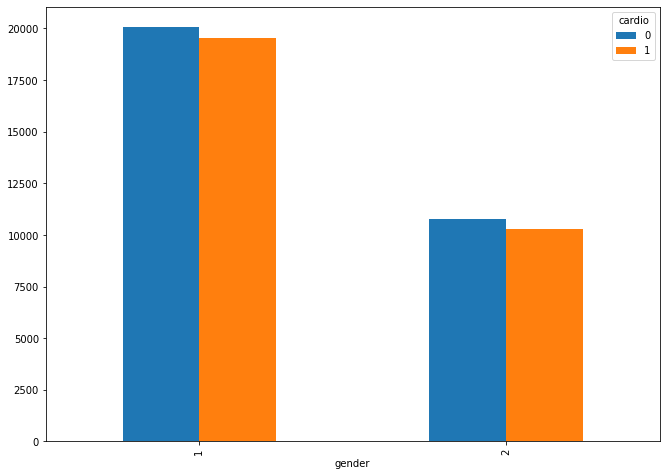

In [ ]:
df.pivot_table(index='gender', columns='cardio', values='weight' , aggfunc='count').plot(kind='bar')

# **Train Test Split**

In [ ]:
# taking only neccesary columns 
X = df.loc[:,'age':'bmi']
y = df[['cardio']]

In [ ]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,51,2,168,62.0,110,80,1,1,0,0,1,22.0
1,56,1,156,85.0,140,90,3,1,0,0,1,34.9
2,52,1,165,64.0,130,70,3,1,0,0,0,23.5
3,49,2,169,82.0,150,100,1,1,0,0,1,28.7
4,48,1,156,56.0,100,60,1,1,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,23.7
69994,58,1,165,80.0,150,80,1,1,0,0,1,29.4
69995,53,2,168,76.0,120,80,1,1,1,0,1,26.9
69998,62,1,163,72.0,135,80,1,2,0,0,0,27.1


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# **Modeling**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


## **Scale dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
X_train_val = scale.transform(X_train_val)

## **Define models**

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train.values.ravel())

svm = SVC(random_state = 19)
svm.fit(X_train, y_train.values.ravel())

decisiontree_classifier = DecisionTreeClassifier(random_state = 19)
decisiontree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=19)

## **Metric accuracy**

In [ ]:
print("Accuracy score of random forest model is: ", random_forest_classifier.score(X_val, y_val))
print("Accuracy score of SVM model is: ", svm.score(X_val, y_val))
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_val, y_val))

Accuracy score of random forest model is:  0.6873053672833852
Accuracy score of SVM model is:  0.731819014471515
Accuracy score of decisiontree model is:  0.6254808572998718


## **Confusion matrix**

The confusion matrix consists of four basic characteristics (numbers) that are used to define the measurement metrics of the classifier. These four numbers are: Presence or absence


●	TP (True Positive): TP represents the number of patients who have been properly classified Presence and they are Presence
●	TN (True Negative): TN represents the number of correctly classified absence who are absence.
●	FP (False Positive): FP represents the number of misclassified patients with the Presence but actually they are absence. FP is also known as a Type I error.
●	FN (False Negative): FN represents the number of patients misclassified as Presence but actually they are suffering from the Presence. FN is also known as a Type II error.


In [ ]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

svm_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred)

random_forest_classifier_pred = random_forest_classifier.predict(X_test)
cm_forest = confusion_matrix(y_test, random_forest_classifier_pred)

In [ ]:
target_names = ['No','Yes']

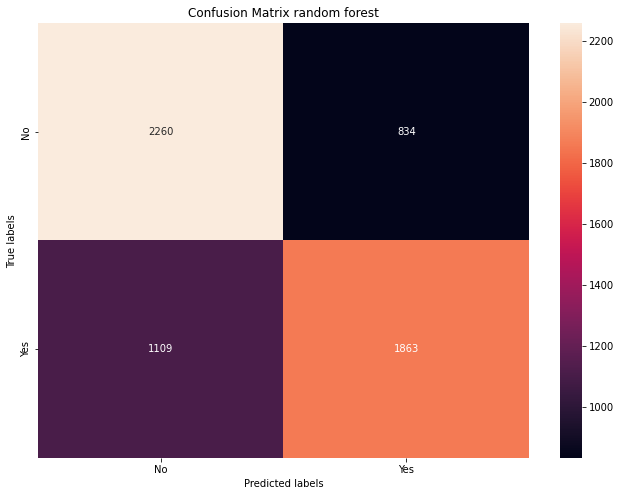

In [ ]:
ax = plt.subplot()
sns.heatmap(cm_forest, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix random forest'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

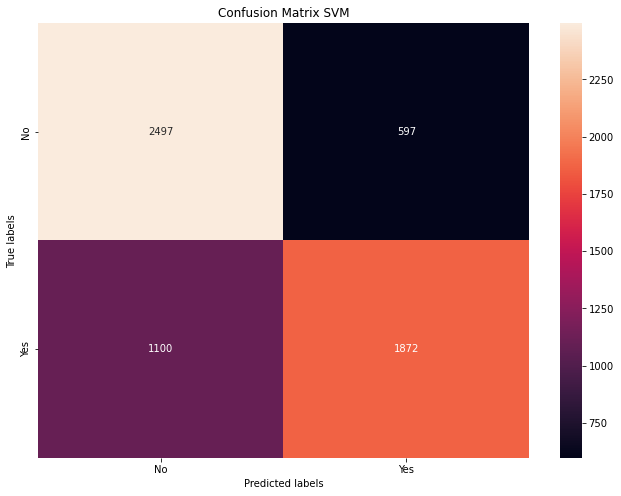

In [ ]:
ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

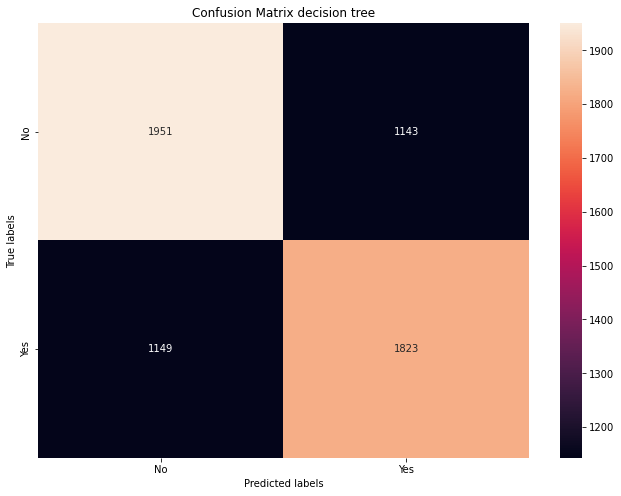

In [ ]:
ax = plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix decision tree'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

From the confusion matrix we can see SVM has 597 No class but predicted as Yes, this is the lowest error.

## **Classification report**

In [ ]:
print("Report model random forest\n")
print(classification_report(random_forest_classifier_pred, y_test, target_names=target_names))

Report model random forest

              precision    recall  f1-score   support

          No       0.73      0.67      0.70      3369
         Yes       0.63      0.69      0.66      2697

    accuracy                           0.68      6066
   macro avg       0.68      0.68      0.68      6066
weighted avg       0.68      0.68      0.68      6066



In [ ]:
print("Report model SVM\n")
print(classification_report(svm_pred, y_test, target_names=target_names))

Report model SVM

              precision    recall  f1-score   support

          No       0.81      0.69      0.75      3597
         Yes       0.63      0.76      0.69      2469

    accuracy                           0.72      6066
   macro avg       0.72      0.73      0.72      6066
weighted avg       0.73      0.72      0.72      6066



In [ ]:
print("Report model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report model decision tree

              precision    recall  f1-score   support

          No       0.63      0.63      0.63      3100
         Yes       0.61      0.61      0.61      2966

    accuracy                           0.62      6066
   macro avg       0.62      0.62      0.62      6066
weighted avg       0.62      0.62      0.62      6066



## **Cross validation score - metric F1-score**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_random_forest = RandomForestClassifier(random_state=19)
scores_cross_val_random_forest = cross_val_score(cross_val_random_forest, X_train_val, y_train_val.values.ravel(), cv=5, scoring='f1_macro')
scores_cross_val_random_forest


array([0.70201433, 0.69892376, 0.70208236, 0.70107009, 0.69301667])

In [ ]:
cross_val_svm = SVC(random_state=19)
scores_cross_val_svm = cross_val_score(cross_val_svm, X_train_val, y_train_val.values.ravel(), cv=5, scoring='f1_macro')
scores_cross_val_svm


array([0.72758426, 0.72503363, 0.72497489, 0.73234   , 0.71751753])

In [ ]:
cross_val_decisiontree = DecisionTreeClassifier(random_state=19)
scores_cross_val_decisiontree = cross_val_score(cross_val_decisiontree, X_train_val, y_train_val.values.ravel(), cv=5, scoring='f1_macro')
scores_cross_val_decisiontree

array([0.62403218, 0.62129429, 0.63283301, 0.62844304, 0.62690459])

By partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles)